### <p style="text-align: center;">Amazon Musical Instruments Reviews <br/> Understand the Customer Feedback</p>
#### <p style="text-align: center;">DSC550 – Data Mining <br/> Spring 2021 <br/> Manish Kalkar</p>
### <p style="text-align: center;">Final Project - Code</p>

## Milestone 1 - Graphical Analysis

### Load the dataset into the DataFrame and display the data

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset into the DataFrame
df_feedback = pd.read_csv("Musical_instruments_reviews.csv")

In [4]:
# Display the data
df_feedback.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
# Find the total number of rows (customer reviews) in DatFrame
df_feedback.shape

(10261, 9)

### 1. Plot the Total Number of Overall Ratings (Counts) of the customer reviews

In [7]:
# Counts of each Overall Rating of the customer review in the DataFrame
df_feedback['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

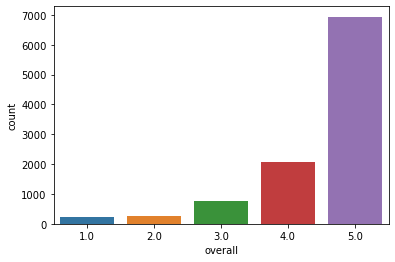

In [9]:
# Plot the counts of each Overall Rating of the customer review in the DataFrame
sns.countplot(x=df_feedback['overall'],data=df_feedback)

### Analysis

<P>
Overall Rating 5.0 has got highest number of counts followed by 4.0 and 3.0. The Overall Ratings of 2.0 and 1.0 belong to unhappy customers remain almost the same in terms of the counts.
</P>

### 2. Plot the Total Number of Overall Ratings (Percentages) of the customer reviews

In [13]:
# Calculate percentages of each Overall Rating of the customer review in the DataFrame
df_feedback['overall'].value_counts(normalize=True)*100

5.0    67.615242
4.0    20.309911
3.0     7.523633
2.0     2.436410
1.0     2.114804
Name: overall, dtype: float64

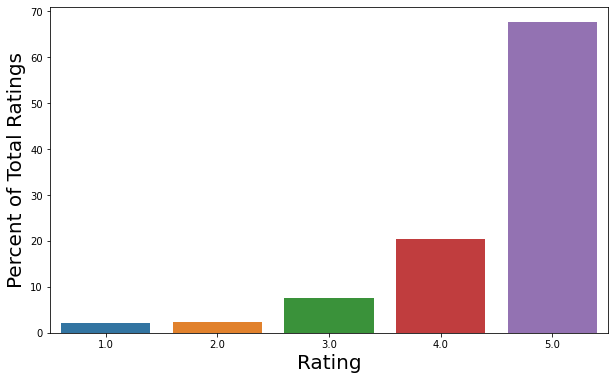

In [12]:
# Plot the Overall Ratings - Percentages
t=pd.DataFrame(data=df_feedback['overall'].value_counts(normalize=True)*100)
plt.figure(figsize=(10,6))
sns.barplot(x=t.index, y=t.overall)
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Percent of Total Ratings',fontsize=20)
plt.show()

### Analysis

<P>
Overall Rating 5.0 has got highest percentage followed by 4.0 and 3.0. The Overall Ratings of 2.0 and 1.0 belong to unhappy customers remain almost the same in terms of the percentages.
</P>

## 3. Plot the Pie Chart showing Overall Ratings - Percentages

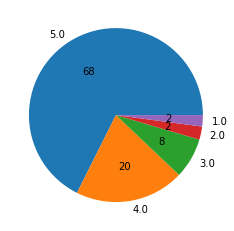

In [51]:
# Assign the labels - Overall Rating
x = ['5.0','4.0','3.0','2.0','1.0']

# Calculate the percentage of each Overall Rating
y = df_feedback['overall'].value_counts(normalize=True)*100

# Define function to covert percentages into actual values
# to be displayed on the pie chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

# plot the pie chart
plt.pie(y, labels = x, autopct = autopct_format(y))
plt.show()

### Analysis

<P>
Above Pie Chart shows the Overall Rating 5.0 has got highest percentage of 68%, the rating 4.0 has got 20% and 3.0 has got 8% of the Overall Rating. The Overall Ratings of 2.0 and 1.0 belong to unhappy customers remain almost the same - 2% each.
</P>

## 4. Plot the Musical Instruments with the Highest Number of Ratings (Top 20)

In [40]:
# Total number of unique reviewers
unique_reviewers = len(df_feedback.reviewerID.unique())
unique_reviewers

1429

In [27]:
# Total number of unique Musical Instruments
unique_musical_instruments = len(df_feedback.asin.unique())
unique_musical_instruments

900

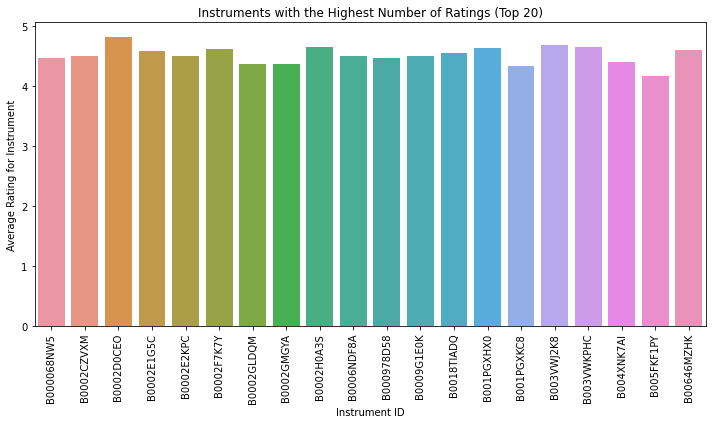

In [58]:
# plot the top 20 highest number of ratings
top_20=df_feedback.asin.value_counts().head(20)
top_20_df=pd.DataFrame()
top_20_ids=list(top_20.index)
for i in top_20_ids:
    top_20_df=top_20_df.append(df_feedback[df_feedback['asin']==i],ignore_index=True)
table = pd.pivot_table(top_20_df, values='overall',index=top_20_df['asin'],aggfunc=np.mean)

#Create Figure
plt.figure(figsize=(10,6))
sns.barplot(x=table.index, y='overall', data=table)
plt.xticks(rotation=90)
plt.xlabel('Instrument ID')
plt.ylabel('Average Rating for Instrument')
plt.title('Instruments with the Highest Number of Ratings (Top 20)')
plt.tight_layout()
plt.show()

## 5. Plot the Musical Instruments with the Fewest Number of Ratings (Bottom 20)

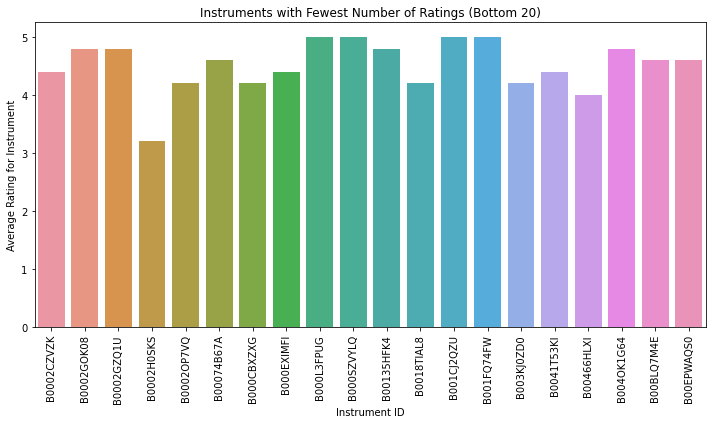

In [57]:
# plot the top 20 fewest number of ratings
btm_20 = df_feedback.asin.value_counts().tail(20)
btm_20_df=pd.DataFrame()
btm_20_ids=list(btm_20.index)
for i in btm_20_ids:
    btm_20_df=btm_20_df.append(df_feedback[df_feedback['asin']==i],ignore_index=True)
table_btm = pd.pivot_table(btm_20_df, values='overall',index=btm_20_df['asin'],aggfunc=np.mean)

#Create Figure
plt.figure(figsize=(10,6))
sns.barplot(x=table_btm.index, y='overall', data=table_btm)
plt.xticks(rotation=90)
plt.xlabel('Instrument ID')
plt.ylabel('Average Rating for Instrument')
plt.title('Instruments with Fewest Number of Ratings (Bottom 20)')
plt.tight_layout()
plt.show()

### Analysis - 4 and 5

<P>
The dataset contains total 10261 reviews on amazon.com provided by 1429 customers on total 900 unique Musical Instruments. Plot 4 shows Musical Instruments with the Highest Number of Ratings (Top 20) and Plot 5 shows Musical Instruments with the Fewest Number of Ratings (Bottom 20). In both cases, Average Rating for the instruments have been plotted.
</P>

## Milestone 2 - Dimensionality / Feature Reduction and Feature Engineering

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import re
import string

In [2]:
# Load the dataset into the DataFrame
df_feedback = pd.read_csv("Musical_instruments_reviews.csv")

In [3]:
# Display the data
df_feedback.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
# Find the total number of rows (customer reviews) in DatFrame
df_feedback.shape

(10261, 9)

In [5]:
# Display columns of the DataFrame
# iterating through the columns
for feedback_columns in df_feedback.columns:
    print(feedback_columns)

reviewerID
asin
reviewerName
helpful
reviewText
overall
summary
unixReviewTime
reviewTime


## Dimensionality / Feature Reduction

In [6]:
# Drop the unnecessary features from the dataset
df_feedback = df_feedback.drop(['reviewerID','asin','reviewerName','unixReviewTime','reviewTime','helpful'],axis=1)

### Justify Dimensionality / Feature Reduction

#### The goal is to perform text analysis / mining of the Customer Feedback Reviews along with the Sentiment Analysis of the reviews and build model to predict the Overall Rating of the products (Musical Instruments). reviewText, Overall and Summary are the only relevant features / colums in the dataset. Rest of the features can be dropped. Above line of code drop all the irrelevant features, which are not needed for the text analysis / data mining.

In [7]:
# Display the data after Feature Reduction
df_feedback

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.
...,...,...,...
10256,"Great, just as expected. Thank to all.",5.0,Five Stars
10257,I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom..."
10258,I have tried coated strings in the past ( incl...,4.0,Good for coated.
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made


### Address any missing data issues

In [8]:
# Determine / Find missing values
df_feedback.isnull().sum()

reviewText    7
overall       0
summary       0
dtype: int64

In [9]:
# fill in the missing values
df_feedback.reviewText.fillna("",inplace = True)

In [10]:
# Check the result / Double check the missing values, if any
df_feedback.isnull().sum()

reviewText    0
overall       0
summary       0
dtype: int64

### Build any new features that are needed for the model

In [11]:
# Build new feature feedbackText by combining two features reviewText and summary
df_feedback['feedbackText'] = df_feedback['reviewText']+ ' '+df_feedback['summary']

In [12]:
# Furthre reduce the features by dropping the features reviewText and summary as we do not need them anymore.
df_feedback = df_feedback.drop(['reviewText','summary'],axis=1)

In [13]:
# Display the data after Dimensionality / Feature Reduction
df_feedback

,overall,feedbackText
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...
...,...,...
10256,5.0,"Great, just as expected. Thank to all. Five S..."
10257,5.0,I've been thinking about trying the Nanoweb st...
10258,4.0,I have tried coated strings in the past ( incl...
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor..."


## Sentiment Analysis

### Sentiment Analysis has been performed based on below listed methods:

1. VADER
2. textblob
3. Based on mapping of Overall Rating Score

In [14]:
# Add two new features / columns to accomodate sentiment data
# Initialize new columns with no values
df_feedback['sentiment'] = ""
df_feedback['sentimentScore'] = ""

In [15]:
# Display DataFrame with two new features
df_feedback

,overall,feedbackText,sentiment,sentimentScore
0,5.0,"Not much to write about here, but it does exac...",,
1,5.0,The product does exactly as it should and is q...,,
2,5.0,The primary job of this device is to block the...,,
3,5.0,Nice windscreen protects my MXL mic and preven...,,
4,5.0,This pop filter is great. It looks and perform...,,
...,...,...,...,...
10256,5.0,"Great, just as expected. Thank to all. Five S...",,
10257,5.0,I've been thinking about trying the Nanoweb st...,,
10258,4.0,I have tried coated strings in the past ( incl...,,
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor...",,


### Sentiment Analysis - Method 1 - Using VADER

In [16]:
# Find the Sentiment Analysis using VADER for each record in the DataFrame

# Create a VADER SentimentIntensityAnalyzer object.
sid_obj = SentimentIntensityAnalyzer()

# Loop through each record in the DataFrame
for index, row in df_feedback.iterrows():

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.    
    sentiment_dict = sid_obj.polarity_scores(row['feedbackText'])
    
    # decide sentiment as positive, negative and neutral
    # sentiment - sentiment data (pos - Postive, neg - Negative, neu - Neutral)
    # sentimentScore - measure sentiment (2 for Postive, 0 for Negative and 0 for Neutral)
    if sentiment_dict['compound'] >= 0.05:
        df_feedback.at[index, 'sentiment'] = "pos"
        df_feedback.at[index, 'sentimentScore'] = 2
    elif sentiment_dict['compound'] <= - 0.05:
        df_feedback.at[index, 'sentiment'] = "neg"
        df_feedback.at[index, 'sentimentScore'] = 0 
    else:
        df_feedback.at[index, 'sentiment'] = "neu"
        df_feedback.at[index, 'sentimentScore'] = 1

In [17]:
# Display the DataFrame with Sentiment Data
df_feedback

,overall,feedbackText,sentiment,sentimentScore
0,5.0,"Not much to write about here, but it does exac...",pos,2
1,5.0,The product does exactly as it should and is q...,pos,2
2,5.0,The primary job of this device is to block the...,neg,0
3,5.0,Nice windscreen protects my MXL mic and preven...,pos,2
4,5.0,This pop filter is great. It looks and perform...,pos,2
...,...,...,...,...
10256,5.0,"Great, just as expected. Thank to all. Five S...",pos,2
10257,5.0,I've been thinking about trying the Nanoweb st...,pos,2
10258,4.0,I have tried coated strings in the past ( incl...,pos,2
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor...",pos,2


In [18]:
# Determine percentage of Postive, Negative and Neutral Reviews
df_feedback.sentimentScore.value_counts(normalize=True)*100

2    91.833155
0     6.656271
1     1.510574
Name: sentimentScore, dtype: float64

#### There are 92% positive reviews and only 6.65% with negative reviews.

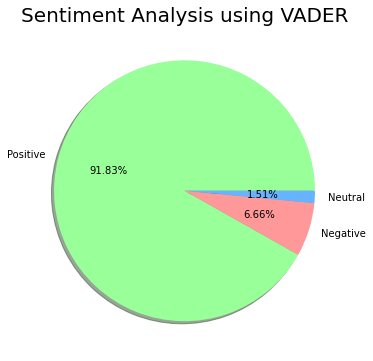

In [19]:
# Plot Sentiment Analysis - Percentages
plt.figure(figsize=(10,6))
colors=['#99ff99','#ff9999','#66b3ff']
 
plt.pie(df_feedback['sentimentScore'].value_counts(normalize=True),colors=colors,labels=['Positive','Negative','Neutral'],autopct='%1.2f%%',shadow=True)
plt.title('Sentiment Analysis using VADER',fontsize=20)

plt.show()

### Sentiment Analysis - Method 2 - Using textblob and NaiveBayesAnalyzer

In [20]:
# Find the Sentiment Analysis using textBlob Blobber for each record in the DataFrame
tb = Blobber(analyzer=NaiveBayesAnalyzer())
for index, row in df_feedback.iterrows():
    blob = tb(row['feedbackText'])
    sentiment = blob.sentiment.classification
    # sentiment - sentiment data (pos - Postive, neg - Negative)
    # sentimentScore - measure sentiment (1 for Postive, 0 for Negative)    
    if sentiment == "pos":
        df_feedback.at[index, 'sentiment'] = "pos"
        df_feedback.at[index, 'sentimentScore'] = 1
    elif sentiment == "neg":
        df_feedback.at[index, 'sentiment'] = "neg"
        df_feedback.at[index, 'sentimentScore'] = 0

In [21]:
# Display the DataFrame with Sentiment Data
df_feedback

,overall,feedbackText,sentiment,sentimentScore
0,5.0,"Not much to write about here, but it does exac...",neg,0
1,5.0,The product does exactly as it should and is q...,pos,1
2,5.0,The primary job of this device is to block the...,pos,1
3,5.0,Nice windscreen protects my MXL mic and preven...,neg,0
4,5.0,This pop filter is great. It looks and perform...,pos,1
...,...,...,...,...
10256,5.0,"Great, just as expected. Thank to all. Five S...",neg,0
10257,5.0,I've been thinking about trying the Nanoweb st...,pos,1
10258,4.0,I have tried coated strings in the past ( incl...,pos,1
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor...",pos,1


In [22]:
# Determine percentage of Postive, Negative Reviews
df_feedback.sentimentScore.value_counts(normalize=True)*100

1    82.711237
0    17.288763
Name: sentimentScore, dtype: float64

#### There are 83% positive reviews and 17% with negative reviews. Neutral category is not considered in textblob, which causes Negative Review category percentage to go up.

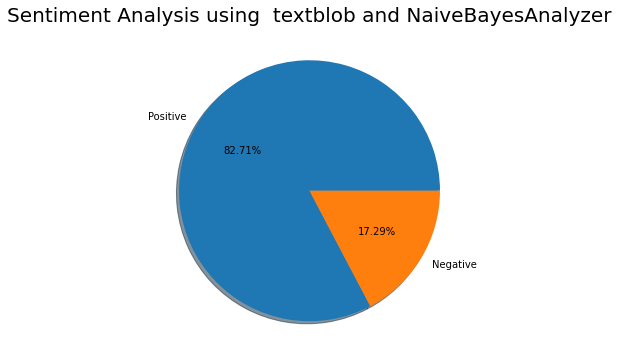

In [23]:
# Plot Sentiment Analysis - Percentages
plt.figure(figsize=(10,6))
#colors=['#99ff99','#ff9999']
 
plt.pie(df_feedback['sentimentScore'].value_counts(normalize=True),labels=['Positive','Negative'],autopct='%1.2f%%',shadow=True)
plt.title('Sentiment Analysis using  textblob and NaiveBayesAnalyzer',fontsize=20)

plt.show()

### Sentiment Analysis - Method 3 - Based on Overall Rating Score

In [24]:
# Map overall rating values to measure the sentiment (sentimentScore)

# overall sentimentScore
#    5        2
#    4        2
#    3        1
#    2        0
#    1        0

# Sentiment 2 - Positive
# Sentiment 1 - Neutral
# Sentiment 0 - Negative

# sentiment feature is not needed. Drop the column - sentiment
df_feedback = df_feedback.drop(['sentiment'],axis=1)

# Mapping is done on sentimentScore                                
df_feedback['sentimentScore'] = df_feedback['overall'].map({5:2,4:2,3:1,2:0,1:0})   

In [25]:
# Display the DataFrame with Sentiment Data
df_feedback

,overall,feedbackText,sentimentScore
0,5.0,"Not much to write about here, but it does exac...",2
1,5.0,The product does exactly as it should and is q...,2
2,5.0,The primary job of this device is to block the...,2
3,5.0,Nice windscreen protects my MXL mic and preven...,2
4,5.0,This pop filter is great. It looks and perform...,2
...,...,...,...
10256,5.0,"Great, just as expected. Thank to all. Five S...",2
10257,5.0,I've been thinking about trying the Nanoweb st...,2
10258,4.0,I have tried coated strings in the past ( incl...,2
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor...",2


In [26]:
# Determine percentage of Postive, Negative, Neutral Reviews
df_feedback.sentimentScore.value_counts(normalize=True)*100

2    87.925153
1     7.523633
0     4.551213
Name: sentimentScore, dtype: float64

#### There are 88% positive reviews and only 4.5% with negative reviews.

<ipython-input-27-1a24b55054f6>:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,explode=explode)
<ipython-input-27-1a24b55054f6>:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(sizes_rating,labels=labels_rating,colors=colors_rating,radius=0.75,startangle=90,explode=explode_ratings)


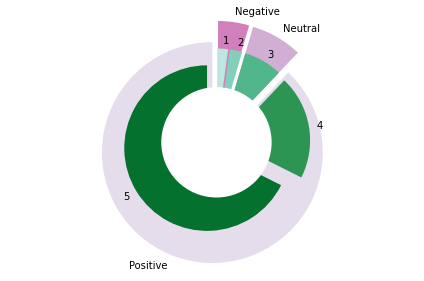

In [27]:
# Data to plot
labels=['Positive','Neutral','Negative']
sizes = [df_feedback['sentimentScore'].value_counts(normalize=True)]
labels_rating = ['5','4','3','2','1']
sizes_rating = [df_feedback['overall'].value_counts(normalize=True)]
#colors = ['olive','lightcoral']
#colors_rating = ['blue','cyan', 'purple','gray']
colors_rating=sns.color_palette("BuGn_r")
colors=sns.color_palette("PuRd")
explode = (0.1,0.1,0.1) 
explode_ratings = (0.1,0.1,0.1,0.1,0.1)

# Plot Sentiment Analysis - Overall Ratings
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,explode=explode)
plt.pie(sizes_rating,labels=labels_rating,colors=colors_rating,radius=0.75,startangle=90,explode=explode_ratings)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

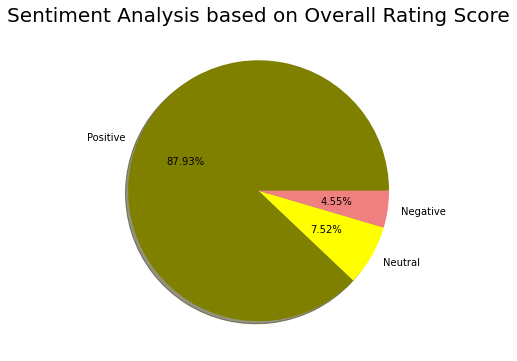

In [28]:
# Plot Sentiment Analysis - Percentages
plt.figure(figsize=(10,6))
colors=['olive','yellow','lightcoral']
 
plt.pie(df_feedback['sentimentScore'].value_counts(normalize=True),colors=colors,labels=['Positive','Neutral','Negative'],autopct='%1.2f%%',shadow=True)
plt.title('Sentiment Analysis based on Overall Rating Score',fontsize=20)

plt.show()

## Feature Engineering

### Make raw data ready for modeling

In [29]:
# Define function to perform below text cleaning
# Make text lowercase
# Remove text in square brackets
# Remove links
# Remove special characters
# Remove words containing numbers
# Remove punctuation

def text_cleaning(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [30]:
# Apply text cleaning function to the DataFrame
df_feedback['feedbackText'] = df_feedback['feedbackText'].apply(text_cleaning)

In [31]:
# Display the cleaned data
df_feedback

,overall,feedbackText,sentimentScore
0,5.0,not much to write about here but it does exac...,2
1,5.0,the product does exactly as it should and is q...,2
2,5.0,the primary job of this device is to block the...,2
3,5.0,nice windscreen protects my mxl mic and preven...,2
4,5.0,this pop filter is great it looks and perform...,2
...,...,...,...
10256,5.0,great just as expected thank to all five s...,2
10257,5.0,i ve been thinking about trying the nanoweb st...,2
10258,4.0,i have tried coated strings in the past incl...,2
10259,4.0,well made by elixir and developed with taylor...,2


### Vectorizing text data

In [32]:
# TFIDF Vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
featureCounts = tfidf.fit_transform(df_feedback.feedbackText)
tfidf_transformer = TfidfTransformer()
features = tfidf_transformer.fit_transform(featureCounts)
labels = df_feedback.overall
features.shape

(10261, 14561)

In [33]:
# Bag of Words
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(df_feedback['feedbackText'].values) 

# Use the fitted CountVectorizer to convert the text to vector
bow = vectorizer.transform(df_feedback['feedbackText'].values)

bow.shape

(10261, 21446)

## Milestone 3 and 4 - Model Selection and Evaluation

In [77]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from scipy import interp

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_classification

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer

import keras
from keras.models import Sequential
from keras.layers import Dense

import re
import string
from numpy import mean
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [78]:
# Load the dataset into the DataFrame
df_feedback = pd.read_csv("Musical_instruments_reviews.csv")

In [79]:
# Display the data
df_feedback.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [80]:
# Find the total number of rows (customer reviews) in DatFrame
df_feedback.shape

(10261, 9)

In [81]:
# Display columns of the DataFrame
# iterating through the columns
for feedback_columns in df_feedback.columns:
    print(feedback_columns)

reviewerID
asin
reviewerName
helpful
reviewText
overall
summary
unixReviewTime
reviewTime


## Dimensionality / Feature Reduction

In [82]:
# Drop the unnecessary features from the dataset
df_feedback = df_feedback.drop(['reviewerID','asin','reviewerName','unixReviewTime','reviewTime','helpful'],axis=1)

In [83]:
# Display the data after Feature Reduction
df_feedback

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.
...,...,...,...
10256,"Great, just as expected. Thank to all.",5.0,Five Stars
10257,I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom..."
10258,I have tried coated strings in the past ( incl...,4.0,Good for coated.
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made


### Address any missing data issues

In [84]:
# Determine / Find missing values
df_feedback.isnull().sum()

reviewText    7
overall       0
summary       0
dtype: int64

In [85]:
# fill in the missing values
df_feedback.reviewText.fillna("",inplace = True)

In [86]:
# Check the result / Double check the missing values, if any
df_feedback.isnull().sum()

reviewText    0
overall       0
summary       0
dtype: int64

### Build any new features that are needed for the model

In [87]:
# Build new feature feedbackText by combining two features reviewText and summary
df_feedback['feedbackText'] = df_feedback['reviewText']+ ' '+df_feedback['summary']

In [88]:
# Furthre reduce the features by dropping the features reviewText and summary as we do not need them anymore.
df_feedback = df_feedback.drop(['reviewText','summary'],axis=1)

In [89]:
# Display the data after Dimensionality / Feature Reduction
df_feedback

,overall,feedbackText
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...
...,...,...
10256,5.0,"Great, just as expected. Thank to all. Five S..."
10257,5.0,I've been thinking about trying the Nanoweb st...
10258,4.0,I have tried coated strings in the past ( incl...
10259,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor..."


## Feature Engineering

### Make raw data ready for modeling

In [90]:
# Define function to perform below text cleaning
# Make text lowercase
# Remove text in square brackets
# Remove links
# Remove special characters
# Remove words containing numbers
# Remove punctuation

def text_cleaning(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [91]:
# Apply text cleaning function to the DataFrame
df_feedback['feedbackText'] = df_feedback['feedbackText'].apply(text_cleaning)

In [92]:
# Display the cleaned data
df_feedback

,overall,feedbackText
0,5.0,not much to write about here but it does exac...
1,5.0,the product does exactly as it should and is q...
2,5.0,the primary job of this device is to block the...
3,5.0,nice windscreen protects my mxl mic and preven...
4,5.0,this pop filter is great it looks and perform...
...,...,...
10256,5.0,great just as expected thank to all five s...
10257,5.0,i ve been thinking about trying the nanoweb st...
10258,4.0,i have tried coated strings in the past incl...
10259,4.0,well made by elixir and developed with taylor...


In [93]:
# Simplify Overall ratings by re-assigning the values as below
# Overall Ratings 4 and above = 1
# Overall Ratings 3 and below = 0
df_feedback['overall'] = df_feedback.overall.apply(lambda x: 1 if x>=4.0 else 0)
df_feedback

,overall,feedbackText
0,1,not much to write about here but it does exac...
1,1,the product does exactly as it should and is q...
2,1,the primary job of this device is to block the...
3,1,nice windscreen protects my mxl mic and preven...
4,1,this pop filter is great it looks and perform...
...,...,...
10256,1,great just as expected thank to all five s...
10257,1,i ve been thinking about trying the nanoweb st...
10258,1,i have tried coated strings in the past incl...
10259,1,well made by elixir and developed with taylor...


In [94]:
# Display value counts for Overall Rating
df_feedback.overall.value_counts()

1    9022
0    1239
Name: overall, dtype: int64

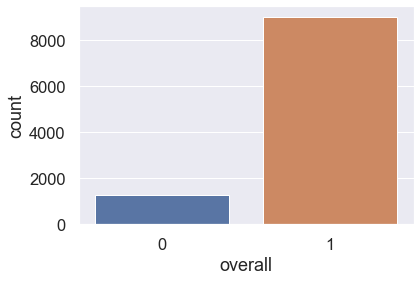

In [95]:
sns.countplot(df_feedback.overall)

In [96]:
# Calculate percentages of each Overall Rating of the customer review in the DataFrame
df_feedback['overall'].value_counts(normalize=True)*100

1    87.925153
0    12.074847
Name: overall, dtype: float64

### Split the data for modeling

In [97]:
#split the data
X = df_feedback.feedbackText
y = df_feedback.overall

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

### Vectorizing text data

In [98]:
# TFIDF Vectorizer

tv = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,2), stop_words='english')

tfidf_x_train = tv.fit_transform(x_train)
tfidf_x_test = tv.transform(x_test)

print('tfidf_x_train:',tfidf_x_train.shape)
print('tfidf_x_test:',tfidf_x_test.shape)

tfidf_x_train: (8208, 196753)
tfidf_x_test: (2053, 196753)


## Model Selection

### With 88% of positive customer feedback reviews, as many as five types of models are selected to run as listed below:

1. Multinomial Naive Bayes
2. Random Forest
3. Linear SVC
4. Logistic Regression
5. XGB Classifier

### 1. Naive Bayes

In [23]:
#Naive Bayes
nb = MultinomialNB()

#fit
tfidf = nb.fit(tfidf_x_train, y_train)

#predict
nb_tfidf_predict = nb.predict(tfidf_x_test)

#accuracy
nb_tfidf = accuracy_score(y_test,nb_tfidf_predict)

# f1 Score
nb_f1 = f1_score(y_test, nb_tfidf_predict, average= 'weighted')

print('NB accuracy:', nb_tfidf)
print('NB f1:', nb_f1)
print(classification_report(y_test, nb_tfidf_predict))

NB accuracy: 0.8889430102289333
NB f1: 0.8366792128250661
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.44      0.50      0.47      2053
weighted avg       0.79      0.89      0.84      2053



#### MultinomialNB Confusion Matrix

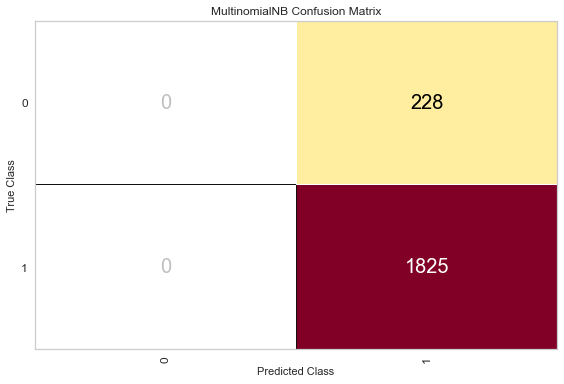

In [24]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(nb, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

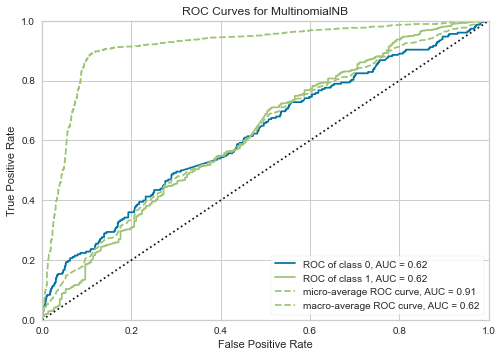

In [25]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(nb)

visualizer.fit(tfidf_x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(tfidf_x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### 2. Random Forest

In [26]:
#random forest
rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

#fit
tfidf = rf.fit(tfidf_x_train, y_train)

#predict
rf_tfidf_predict = rf.predict(tfidf_x_test)

#accuracy
rf_tfidf = accuracy_score(y_test,rf_tfidf_predict)

# f1 Score
rf_f1 = f1_score(y_test, rf_tfidf_predict, average= 'weighted')

print('rf accuracy:', rf_tfidf)
print('rf f1:', rf_f1)
print(classification_report(y_test, rf_tfidf_predict))
print('****Confusion Matrix****')
print(confusion_matrix(y_test, rf_tfidf_predict))

rf accuracy: 0.8889430102289333
rf f1: 0.8366792128250661
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.44      0.50      0.47      2053
weighted avg       0.79      0.89      0.84      2053

****Confusion Matrix****
[[   0  228]
 [   0 1825]]


#### Random Forest Classifier Confusion Matrix

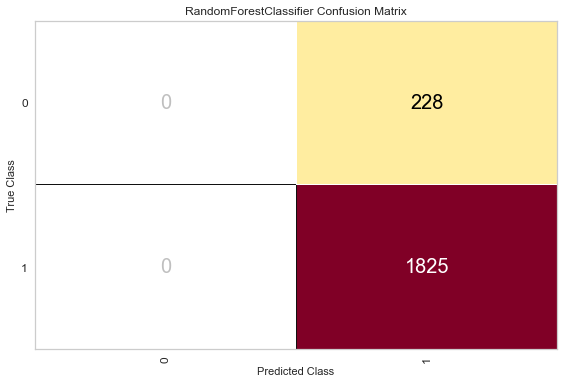

In [27]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(rf, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 3. Linear SVC

In [28]:
#Linear SVC
ls = LinearSVC()

#fit
tfidf = ls.fit(tfidf_x_train, y_train)

#predict
ls_tfidf_predict = ls.predict(tfidf_x_test)

#accuracy
ls_tfidf = accuracy_score(y_test,ls_tfidf_predict)

# f1 Score
ls_f1 = f1_score(y_test, ls_tfidf_predict, average= 'weighted')

print('ls accuracy:', ls_tfidf)
print('ls f1:', ls_f1)
print(classification_report(y_test, ls_tfidf_predict))

ls accuracy: 0.8899171943497322
ls f1: 0.8390423617541617
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.94      0.50      0.48      2053
weighted avg       0.90      0.89      0.84      2053



#### Linear SVC Confusion Matrix

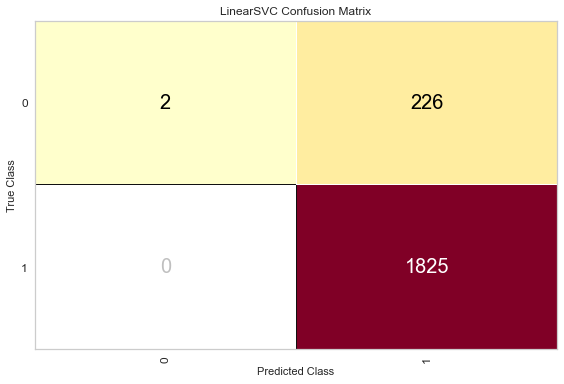

In [29]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(ls, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 4. Logistic Regression

In [99]:
#lr
lr = LogisticRegression(solver='newton-cg')

#fit
tfidf = lr.fit(tfidf_x_train, y_train)

#predict
lr_tfidf_predict = lr.predict(tfidf_x_test)

#accuracy
lr_tfidf = accuracy_score(y_test,lr_tfidf_predict)

# f1 Score
lr_f1 = f1_score(y_test, lr_tfidf_predict, average= 'weighted')

print('lr accuracy:', lr_tfidf)
print('lr f1:', lr_f1)
print(classification_report(y_test, lr_tfidf_predict))

lr accuracy: 0.8889430102289333
lr f1: 0.8366792128250661
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.44      0.50      0.47      2053
weighted avg       0.79      0.89      0.84      2053



#### Logistic Regression Confusion Matrix

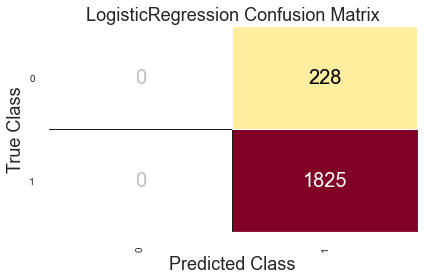

In [100]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(lr, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 5. XGB CLASSIFIER

### Hyperparameter Tuning

In [32]:
#RandomSearchCV
# define the parameters to tune
param_dist = {"learning_rate": uniform(0, 2),
              "gamma": uniform(1, 0.000001),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10),
              'n_jobs': range(1,5)}
#instance of RandomSearchCV
rs = RandomizedSearchCV(XGBClassifier(eval_metric='mlogloss'), param_distributions=param_dist, n_iter=3)

### Create Data Pipeline

In [33]:
model  = Pipeline([
    ('count', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', rs)
])

In [34]:
#fit
tfidf = model.fit(x_train, y_train)

#predict
xgb_tfidf_predict = model.predict(x_test)

#accuracy
xgb_tfidf = accuracy_score(y_test, xgb_tfidf_predict)

# f1 Score
xgb_f1 = f1_score(y_test, xgb_tfidf_predict, average= 'weighted')

print('xgb accuracy:', xgb_tfidf)
print('xgb f1:', xgb_f1)
print(classification_report(y_test, xgb_tfidf_predict))

xgb accuracy: 0.8879688261081344
xgb f1: 0.8671027264915355
              precision    recall  f1-score   support

           0       0.49      0.21      0.29       228
           1       0.91      0.97      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.70      0.59      0.61      2053
weighted avg       0.86      0.89      0.87      2053



In [35]:
# Separate function to create a confusion matrix for XGB Classifier 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

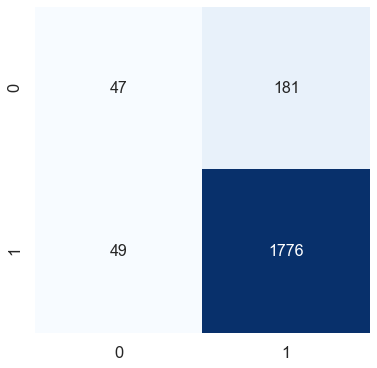

In [36]:
#Calling function to plot Confusion Matrix for XGB Classifier
conf_matrix(y_test, xgb_tfidf_predict)

### Due to highly unbalanced dataset of customer feedback that has 88% of the postive reviews and 10% neutral and only 2% negative reviews, accuracy of all the models selected to run is almost the same = 89%.

### Let's manage the imbalanced dataset with help of evaluating below additional methods:

1. Logistic Regression Model using class_weight
2. Neural Network Classifier
3. Neural Network Classifier with Keras
4. Logistic Regression Model - with Downsampling
5. Compare f1 Scores

### 1. Logistic Regression model with class_weight on an Imbalanced Dataset

In [37]:
#lr-cw
lrcw = LogisticRegression(solver='newton-cg', class_weight='balanced')

#fit
tfidf = lrcw.fit(tfidf_x_train, y_train)

#predict
lrcw_tfidf_predict = lrcw.predict(tfidf_x_test)

#accuracy
lrcw_tfidf = accuracy_score(y_test, lrcw_tfidf_predict)

# f1 Score
lrcw_f1 = f1_score(y_test, lrcw_tfidf_predict, average= 'weighted')

print('lrcw accuracy:', lrcw_tfidf)
print('lrcw f1:', lrcw_f1)
print(classification_report(y_test, lrcw_tfidf_predict))

lrcw accuracy: 0.8918655625913298
lrcw f1: 0.8436709501144031
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       228
           1       0.89      1.00      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.95      0.51      0.50      2053
weighted avg       0.90      0.89      0.84      2053



#### Logistic Regression (class_weight) Confusion Matrix

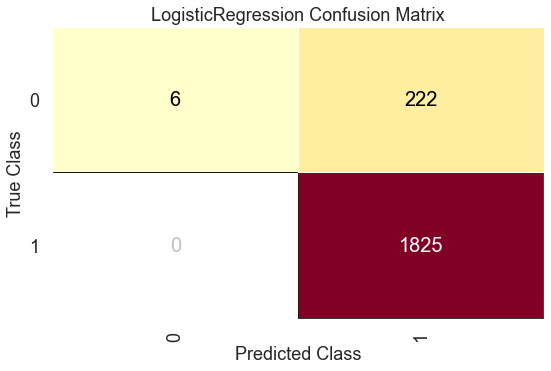

In [38]:
#The ConfusionMatrix visualizer taxes a model
classes = ['0','1']
cm = ConfusionMatrix(lrcw, classes=classes, percent=False)

# Fit the model
cm.fit(tfidf_x_train, y_train)

#Score runs predict() on the data and then creates the confusion_matrix
cm.score(tfidf_x_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
#Plot the confusion matrix
cm.poof()

### 2. Neural Network Classifier

In [39]:
# Neural Network Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,75,50))

#fit
tfidf = mlp.fit(tfidf_x_train, y_train)

#predict
mlp_tfidf_predict = mlp.predict(tfidf_x_test)

#accuracy
mlp_tfidf = accuracy_score(y_test, mlp_tfidf_predict)

# f1 Score
mlp_f1 = f1_score(y_test, mlp_tfidf_predict, average= 'weighted')

# confusion matrix
mlp_matrix_tfidf = confusion_matrix(y_test, mlp_tfidf_predict)

# display accuracy, f1 score, confusion matrix and classification report with precision and recall
print('mlp accuracy:', mlp_tfidf)
print('mlp f1 score:', mlp_f1)
print('mlp confusion matrix:')
print(mlp_matrix_tfidf)
print(classification_report(y_test, mlp_tfidf_predict))

mlp accuracy: 0.885046273745738
mlp f1 score: 0.8475421209916555
mlp confusion matrix:
[[  16  212]
 [  24 1801]]
              precision    recall  f1-score   support

           0       0.40      0.07      0.12       228
           1       0.89      0.99      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.65      0.53      0.53      2053
weighted avg       0.84      0.89      0.85      2053



#### Neural Network Classifier Confusion Matrix

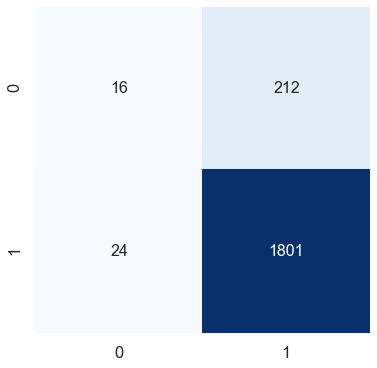

In [40]:
#Calling function to plot Confusion Matrix for XGB Classifier
conf_matrix(y_test, mlp_tfidf_predict)

### 3. Neural Network Classifier with Keras

In [41]:
# convert categories into an array
y = np.array(y)

In [44]:
# Encode target variables with value between 0 and n_classes-1 (n_classes = 3)
label_encoder = preprocessing.LabelEncoder()
int_encode = label_encoder.fit_transform(y)

In [45]:
# Encode categorical features as a one-hot numeric array.
# input is an array - int_encode created above
# This creates a binary column for each category in y
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
int_encode = int_encode.reshape(len(int_encode), 1)
y = onehot_encoder.fit_transform(int_encode)

In [46]:
# Set the number of features we want
number_of_features = 5000

In [47]:
# convert feature data X to feature matrix
token = Tokenizer(num_words=number_of_features)
token.fit_on_texts(X)
seq_X = token.texts_to_sequences(X)
X = token.sequences_to_matrix(seq_X, mode='binary')
X.shape

(10261, 5000)

In [48]:
#split the original data again after tokenization
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [49]:
# display shape of target train
y_train.shape

(8208, 2)

In [52]:
# Set the Neural network
model = Sequential()
model.add(Dense(48, activation='relu', input_shape = (number_of_features,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
# fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.1)
history

Epoch 1/10
116/116 [==============================] - 15s 20ms/step - loss: 0.4477 - accuracy: 0.8504 - val_loss: 0.2865 - val_accuracy: 0.8770
Epoch 2/10
116/116 [==============================] - 1s 11ms/step - loss: 0.2236 - accuracy: 0.9033 - val_loss: 0.2772 - val_accuracy: 0.8952
Epoch 3/10
116/116 [==============================] - 1s 12ms/step - loss: 0.1393 - accuracy: 0.9509 - val_loss: 0.3080 - val_accuracy: 0.8928
Epoch 4/10
116/116 [==============================] - 1s 12ms/step - loss: 0.0832 - accuracy: 0.9745 - val_loss: 0.3818 - val_accuracy: 0.8928
Epoch 5/10
116/116 [==============================] - 1s 11ms/step - loss: 0.0441 - accuracy: 0.9907 - val_loss: 0.4335 - val_accuracy: 0.8965
Epoch 6/10
116/116 [==============================] - 1s 10ms/step - loss: 0.0296 - accuracy: 0.9968 - val_loss: 0.5235 - val_accuracy: 0.8928
Epoch 7/10
116/116 [==============================] - 1s 11ms/step - loss: 0.0158 - accuracy: 0.9985 - val_loss: 0.5514 - val_accuracy: 0.889

In [54]:
#predict
y_pred = model.predict(X_test)

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

#accuracy
nn_keras_accuracy = accuracy_score(y_test,y_pred)

# f1 Score
nn_keras_f1 = f1_score(y_test, y_pred, average= 'weighted')

# confusion matrix
nn_keras_matrix = confusion_matrix(y_test, y_pred)

print('nn keras accuracy:', nn_keras_accuracy)
print('nn keras f1 score:', nn_keras_f1)
print('nn keras confusion matrix:')
print(nn_keras_matrix)
print(classification_report(y_test, y_pred))

nn keras accuracy: 0.8899171943497322
nn keras f1 score: 0.883326012532748
nn keras confusion matrix:
[[  88  140]
 [  86 1739]]
              precision    recall  f1-score   support

           0       0.51      0.39      0.44       228
           1       0.93      0.95      0.94      1825

    accuracy                           0.89      2053
   macro avg       0.72      0.67      0.69      2053
weighted avg       0.88      0.89      0.88      2053



#### Neural Network Classifier with Keras - Confusion Matrix

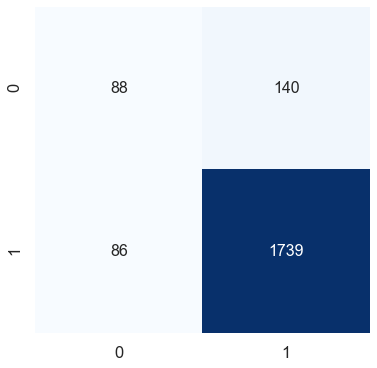

In [55]:
#Calling function to plot Confusion Matrix for Neural Network with Keras
conf_matrix(y_test, y_pred)

### 4. Logistic Regression Model - with Downsampling

In [60]:
# Separate majority and minority classes
df_majority = df_feedback[df_feedback.overall==1]
df_minority = df_feedback[df_feedback.overall==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5000,   # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.overall.value_counts()

1    5000
0    1239
Name: overall, dtype: int64

In [61]:
# Display the downsampled dataframe shape
df_downsampled.shape

(6239, 2)

In [62]:
# Display the downsampled data
df_downsampled

,overall,feedbackText
8547,1,i ve only recently heard of joyo pedals and t...
858,1,perfect fit for me i don t like a pick that i...
4034,1,i really like this strap it s comfortable ad...
5581,1,when i purchased this pedal from a local music...
3410,1,a little bigger than my other pick holder so ...
...,...,...
10189,0,i am a fan of planet waves ns capos but this ...
10192,0,the planet waves d addario artist capo seems l...
10237,0,don t get me wrong the improvement over the o...
10247,0,i was looking forward to trying these as i ve...


In [63]:
#Set the data to X and y
X = df_downsampled.drop('overall', axis=1)
y = df_downsampled.overall

In [64]:
# Encode the string variables
label_encoder = preprocessing.LabelEncoder()
int_encode = label_encoder.fit_transform(X)

In [65]:
# Encode the string variable as a one-hot numeric array
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
int_encode = int_encode.reshape(len(int_encode), 1)
X = onehot_encoder.fit_transform(int_encode)

In [66]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [68]:
# Run the Logistic Regression Model on downsampled dataset
lr_dwn_smpl = LogisticRegression(solver='newton-cg')

#fit
lr_dwn_smpl_fit = lr_dwn_smpl.fit(X_train, y_train)

#predict
lr_dwn_smpl_predict = lr_dwn_smpl.predict(X_test)

#accuracy
lr_dwn_smpl_ac = accuracy_score(y_test, lr_dwn_smpl_predict)

# f1 Score
lr_dwn_smpl_f1 = f1_score(y_test, lr_dwn_smpl_predict, average= 'weighted')

print('lr accuracy:', lr_dwn_smpl_ac)
print('lr f1:', lr_dwn_smpl_f1)
print(classification_report(y_test, lr_dwn_smpl_predict))

lr accuracy: 0.8205128205128205
lr f1: 0.7396171903214157
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       224
           1       0.82      1.00      0.90      1024

    accuracy                           0.82      1248
   macro avg       0.41      0.50      0.45      1248
weighted avg       0.67      0.82      0.74      1248



#### Neural Network Classifier with Keras - Confusion Matrix

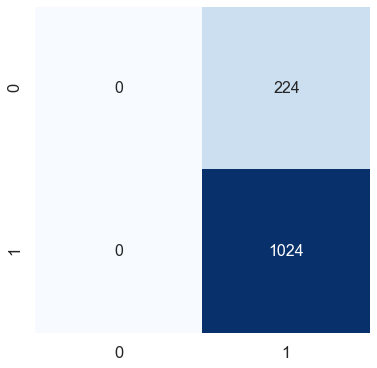

In [69]:
#Calling function to plot Confusion Matrix for Logistic Regression Model - with Downsampling
conf_matrix(y_test, lr_dwn_smpl_predict)

## Model Evaluation

### Model evaluation based on accuracy

In [101]:
# Compare all the model results
model_accuracy_data = {'model': ['Naive Bayes', 'Random Forest', 'Linear SVC', 'Logistic Regression', 'XGB Classifier', 'Logistic Regression - class_weight', 'Neural Network Classifier', 'Neural Network Classifier with Keras', 'Logistic Regression Model - with Downsampling'], 
 'accuracy': [nb_tfidf * 100, rf_tfidf * 100, ls_tfidf * 100, lr_tfidf * 100, xgb_tfidf * 100, lrcw_tfidf * 100, mlp_tfidf * 100, nn_keras_accuracy * 100, lr_dwn_smpl_ac * 100]
}
df_model_accuracy = pd.DataFrame(model_accuracy_data, columns = ['model', 'accuracy'])
df_model_accuracy

,model,accuracy
0,Naive Bayes,88.894301
1,Random Forest,88.894301
2,Linear SVC,88.991719
3,Logistic Regression,88.894301
4,XGB Classifier,88.796883
5,Logistic Regression - class_weight,89.186556
6,Neural Network Classifier,88.504627
7,Neural Network Classifier with Keras,88.991719
8,Logistic Regression Model - with Downsampling,82.051282


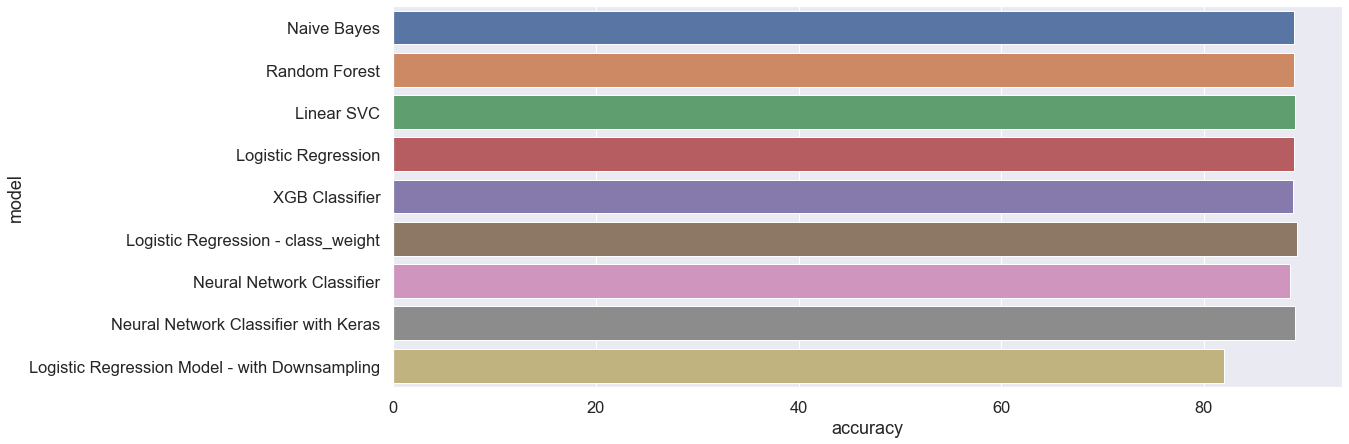

In [102]:
# Plot the Model Comparison based on accuracy
plt.figure(figsize = (17,7))
sns.barplot(y = df_model_accuracy.model, x = df_model_accuracy.accuracy)

### For imbalanced data, Accuracy may not be the best measure of evaluating the model.

### However, downsampling the majority class data does show the variation in the accuracy. 

### Let's compare the f1 Scores instead.

### 1. Model evaluation based on f1 Score

In [103]:
# Compare all the f1 Scores
model_f1_score_data = {'model': ['Naive Bayes', 'Random Forest', 'Linear SVC', 'Logistic Regression', 'XGB Classifier', 'Logistic Regression - class_weight', 'Neural Network Classifier', 'Neural Network Classifier with Keras', 'Logistic Regression Model - with Downsampling'], 
 'f1_score': [nb_f1, rf_f1, ls_f1, lr_f1, xgb_f1, lrcw_f1, mlp_f1, nn_keras_f1, lr_dwn_smpl_f1]
}
df_model_f1_score = pd.DataFrame(model_f1_score_data, columns = ['model', 'f1_score'])
df_model_f1_score

,model,f1_score
0,Naive Bayes,0.836679
1,Random Forest,0.836679
2,Linear SVC,0.839042
3,Logistic Regression,0.836679
4,XGB Classifier,0.867103
5,Logistic Regression - class_weight,0.843671
6,Neural Network Classifier,0.847542
7,Neural Network Classifier with Keras,0.883326
8,Logistic Regression Model - with Downsampling,0.739617


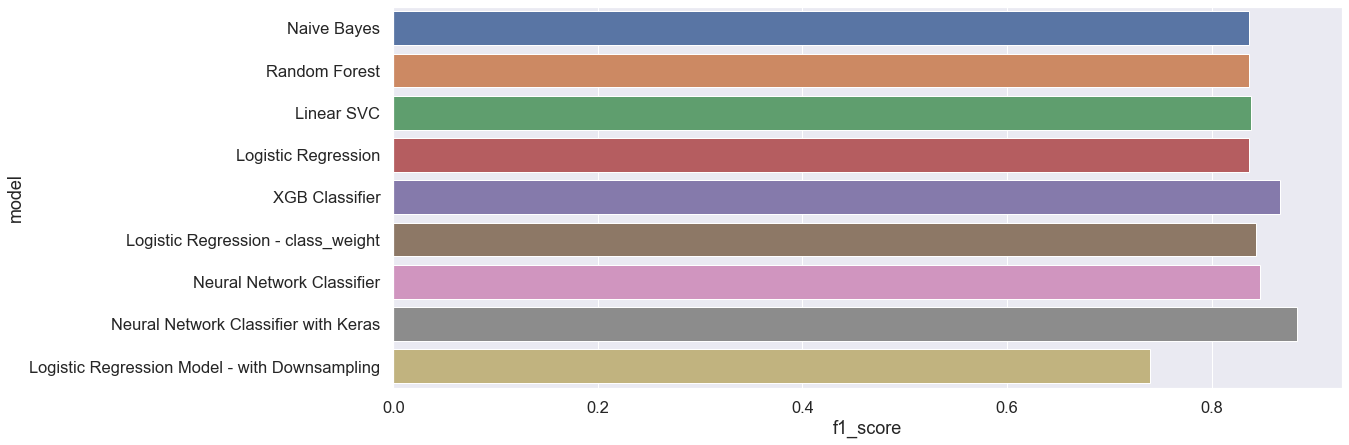

In [104]:
# Plot the Model Comparison based on accuracy
plt.figure(figsize = (17,7))
sns.barplot(y = df_model_f1_score.model, x = df_model_f1_score.f1_score)

## Based on the f1 score of the weighted averages, Neural Network with Keras shows best results.